In [ ]:
# Find neighbours
neighbours = find_neighbours(dat# Save the sorted dataset
data_sorted.to_csv('sorted_outliers.csv, index=false')a) # Use 'data' instead of 'df'

# Function to calculate outlier score
def calculate_outlier_scores(df, neighbours):
    # Initialize outlier score columns for each party
    for party in ['APC', 'LP', 'PDP', 'NNPP']:
        df[f'{party}_outlier_score'] = 0  # Create columns before incrementing

    for i, row in df.iterrows():
        # Handle cases where PU-Code might not have neighbours
        if row['PU-Code'] in neighbours:
            for neighbour_id in neighbours[row['PU-Code']]:
                neighbour_row = df[df['PU-Code'] == neighbour_id]
                for party in ['APC', 'LP', 'PDP', 'NNPP']:  # replace with actual party names
                    df.at[i, f'{party}_outlier_score'] += abs(row[party] - neighbour_row[party].values[0])
    return df

    # Calculate outlier scores
data = calculate_outlier_scores(data, neighbours) # Use 'data' instead of 'df'

In [ ]:
# Sort by outlier scores
data_sorted = data.sort_values(by='APC_outlier_score', ascending=False) # Sort by one of the party outlier score columns

In [ ]:
# Save the sorted dataset
data_sorted.to_csv('sorted_outliers.csv, index=false')

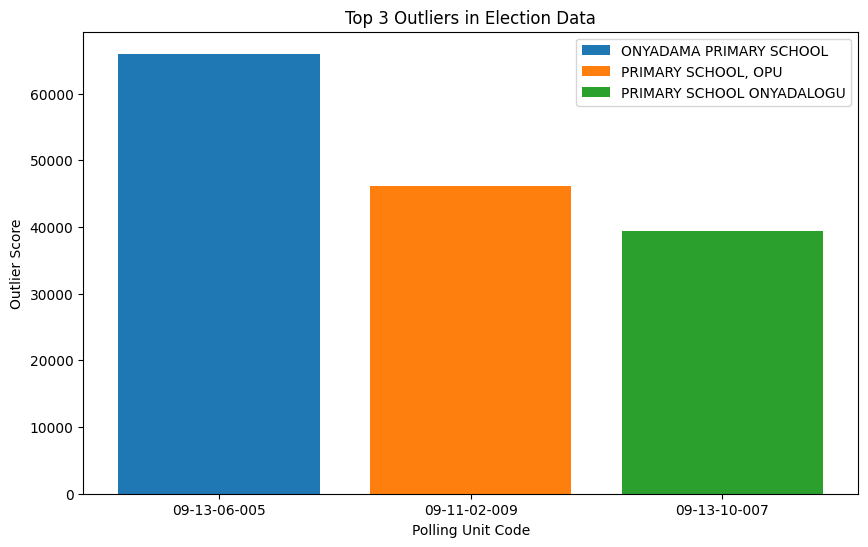

In [ ]:
import matplotlib.pyplot as plt
import folium
import pandas as pd # Import pandas for handling NaN values

# Extract top 3 outliers
top_3_outliers = data_sorted.head(3)  # Use data_sorted instead of df_sorted_outliers

# Visualization of outlier scores
plt.figure(figsize=(10, 6))

# Plot each outlier's scores
# Use the correct outlier score column name, e.g., 'APC_outlier_score' or 'LP_outlier_score'
for i, row in top_3_outliers.iterrows():
    plt.bar(row['PU-Code'], row['APC_outlier_score'], label=row['PU-Name']) # Replace 'APC_outlier_score' with the correct column

plt.xlabel('Polling Unit Code')
plt.ylabel('Outlier Score')
plt.title('Top 3 Outliers in Election Data')
plt.legend()
plt.show()

In [ ]:
# Map visualization using folium

# Initialize the map
m = folium.Map(location=[5.854970, 8.598120], zoom_start=10)  # Centered on rossriver

# Add markers for each outlier, handling potential NaN values
for i, row in top_3_outliers.iterrows():
    if pd.notna(row['latitude']) and pd.notna(row['longitude']):  # Check for valid coordinates
        # Use the correct outlier score column name in the popup
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"{row['PU-Name']} - Outlier Score: {row['APC_outlier_score']}", # Replace 'APC_outlier_score'
            tooltip=row['PU-Name']
        ).add_to(m)
    else:
        print(f"Skipping marker for {row['PU-Name']} due to missing coordinates.")  # Notify user about skipped markers

# Save the map to an HTML file in the current directory
m.save('top_3_outliers_map.html') # Change the path to a valid directory